In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("storedata.csv")

In [3]:
data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [4]:
data.shape

(136, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
Town                  136 non-null object
Country               136 non-null object
Store ID              136 non-null int64
Manager name          136 non-null object
Staff                 136 non-null int64
Floor Space           136 non-null int64
Window                136 non-null int64
Car park              136 non-null object
Demographic score     136 non-null int64
Location              136 non-null object
40min population      136 non-null int64
30 min population     136 non-null int64
20 min population     136 non-null int64
10 min population     136 non-null int64
Store age             136 non-null int64
Clearance space       136 non-null int64
Competition number    136 non-null int64
Competition score     136 non-null int64
Performance           136 non-null object
dtypes: int64(13), object(6)
memory usage: 20.3+ KB


## Exploratory Data Analysis

In [6]:
data['Performance'].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

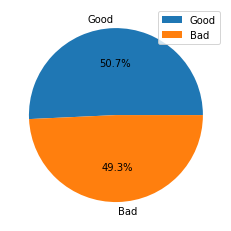

In [8]:
plt.pie(data['Performance'].value_counts(), labels = ['Good', 'Bad'], autopct='%.1f%%')
plt.legend()
plt.show()

In [9]:
data['Car park'].value_counts()

Yes    94
No     35
Y       4
N       3
Name: Car park, dtype: int64

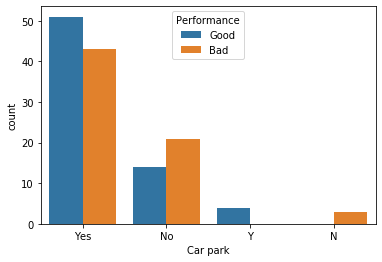

In [12]:
sns.countplot(x = 'Car park', hue = 'Performance', data = data)

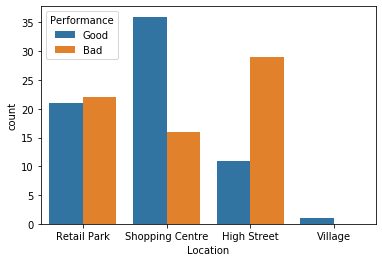

In [13]:
sns.countplot(x = 'Location', hue = 'Performance', data = data)

In [14]:
data.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [17]:
num_data = data[['Staff', 'Floor Space', 'Window', 'Demographic score', '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space', 'Competition number', 'Competition score']]

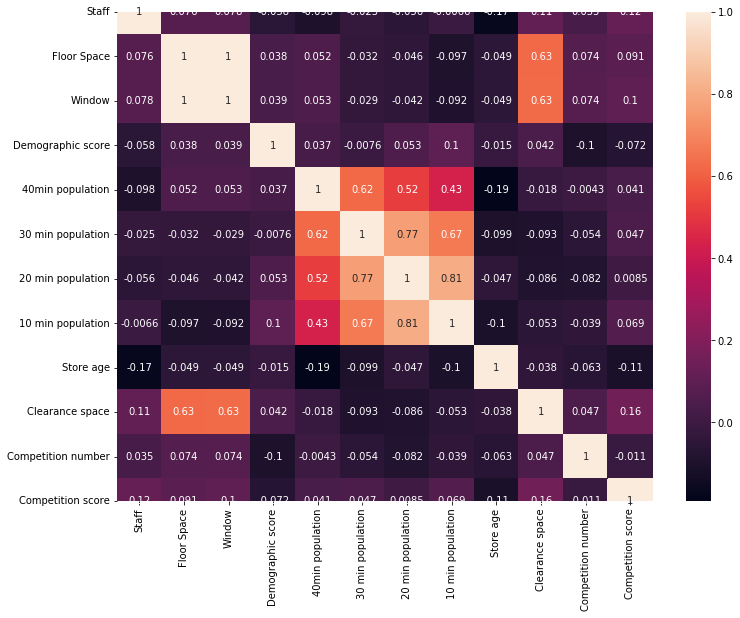

In [18]:
plt.figure(figsize = (12, 9))

cor = num_data.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [19]:
cor

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
Staff,1.000000,0.076039,0.077630,-0.057831,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579
Floor Space,0.076039,1.000000,0.999208,0.038187,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447
Window,0.077630,0.999208,1.000000,0.038633,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551
Demographic score,-0.057831,0.038187,0.038633,1.000000,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325
40min population,-0.098366,0.051918,0.053228,0.036694,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554
30 min population,-0.024631,-0.032199,-0.028688,-0.007616,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811
20 min population,-0.056310,-0.046161,-0.042441,0.053498,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492
10 min population,-0.006601,-0.096698,-0.091651,0.099587,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781
Store age,-0.172655,-0.049285,-0.048992,-0.014967,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725
Clearance space,0.110591,0.627324,0.628509,0.041849,-0.018234,-0.093048,-0.085887,-0.053129,-0.037935,1.000000,0.047191,0.156431


In [20]:
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = num_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
cor_features = correlation(num_data, 0.75)
cor_features

{'10 min population', '20 min population', 'Window'}

In [22]:
data.drop(['10 min population', '20 min population', 'Window'], axis = 1, inplace = True)

In [23]:
data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,Yes,10,Retail Park,1288374,1138224,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,Yes,11,Shopping Centre,1086225,1015321,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,No,12,Retail Park,1595638,1281661,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,No,14,High Street,1179395,1022959,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,No,18,Retail Park,1398558,1085170,7,200,19,13,Bad


In [24]:
data.drop(['Town', 'Country', 'Manager name', 'Store ID'], axis = 1, inplace = True)

In [25]:
data.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,Yes,10,Retail Park,1288374,1138224,3,238,16,16,Good
1,8,18569,Yes,11,Shopping Centre,1086225,1015321,4,384,15,19,Good
2,-2,12288,No,12,Retail Park,1595638,1281661,11,219,13,18,Bad
3,7,17092,No,14,High Street,1179395,1022959,5,261,15,12,Bad
4,7,11307,No,18,Retail Park,1398558,1085170,7,200,19,13,Bad


In [26]:
data.shape

(136, 12)

In [29]:
data['Car park'] = data['Car park'].replace({"Y": "Yes", "N": "No"})

In [31]:
objList = data.select_dtypes(include = 'object').columns
objList

Index(['Car park', 'Location', 'Performance'], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
for i in objList:
    data[i] = le.fit_transform(data[i])

In [34]:
data.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,1,10,1,1288374,1138224,3,238,16,16,1
1,8,18569,1,11,2,1086225,1015321,4,384,15,19,1
2,-2,12288,0,12,1,1595638,1281661,11,219,13,18,0
3,7,17092,0,14,0,1179395,1022959,5,261,15,12,0
4,7,11307,0,18,1,1398558,1085170,7,200,19,13,0


In [35]:
X = data.drop('Performance', axis = 1)
y = data['Performance']

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Buiding & Evaluation

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred_log = log_reg.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred_log)

0.5357142857142857

In [48]:
## Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred_nb = nb.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred_nb)

0.39285714285714285

In [54]:
## KNN

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [55]:
y_pred_knn = knn.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred_knn)

0.6785714285714286